# Tugas Pertemuan 12 | Praktikum Mandiri

**Nama: Reva Aulia Faradilah**

**NIM: 0110222145**

**Kelas: ML Pagi - 2022**

---

# 1. Import Library

In [1]:
# Import library
import pandas as pd
import numpy as np

# Library Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualisasi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Untuk 3D plot
# Pengaturan visualisasi
plt.rcParams['figure.figsize'] = (8, 6)

Kode tersebut dijalankan untuk menyiapkan seluruh kebutuhan pustaka untuk proses analisis, pemodelan machine learning, serta visualisasinya. Pandas dan NumPy digunakan untuk mengolah data dan perhitungan numerik. Library scikit-learn diimpor beberapa modul untuk membagi data, menormalkan data, mengurangi dimensi dengan PCA, membuat model klasifikasi SVM, serta mengevaluasi hasil model. Untuk visualisasi diimport library matplotlib untuk membuat grafik, seperti 3D, dan mengatur ukuran gambarnya.

# 2. Baca File CSV


In [2]:
# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
import os

# Memanggil dataset melalui gdrive
path = "gdrive/MyDrive/MachineLearning/praktikum12/data/"

# Membaca file csv
df = pd.read_csv(path + 'data.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Menghubungkan Colab dengan Google Drive agar file dataset yang tersimpan di Drive dapat diakses langsung. Setelah proses penyambungan berhasil dilakukan, dataset dipanggil dengan menentukan alamat atau path folder tempat file CSV disimpan. Kemudian, dataset ditampilkan di layar.

# 3. Eksplorasi Awal Dataset

In [3]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

`df.info()` digunakan untuk menampilkan informasi umum tentang dataset. Hasilnya menunjukkan bahwa data memiliki 569 baris dan 33 kolom, lengkap dengan nama kolom, jumlah data non-null, dan tipe datanya. Sebagian besar kolom bertipe angka (float), kolom id bertipe bilangan bulat (int), dan diagnosis bertipe teks (object). Kolom Unnamed: 32 tidak memiliki data sama sekali.

In [4]:
# Statistik deskriptif
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


`df.describe()` digunakan untuk menampilkan statistik deskriptif dari data numerik. Hasilnya menunjukkan ringkasan seperti jumlah data, nilai rata-rata standar deviasi, nilai minimum, maksimum, dan kuartil.

In [5]:
# Cek missing value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


`df.isnull().sum()` digunakan untuk menghitung jumlah nilai kosong (*missing value*) pada tiap kolom. Outputnya menunjukkan seluruh kolom bernilai 0 (tidak ada data kosong), kecuali kolom **`Unnamed: 32`** yang memiliki **569** nilai kosong. Ini menandakan kolom tersebut sepenuhnya kosong, sehingga dapat dihapus karena tidak memuat informasi yang berguna.

In [6]:
# Cek duplikat value
df.duplicated().sum()

np.int64(0)

`df.duplicated().sum()` digunakan untuk mengecek dan menghitung berapa banyak baris data yang terdeteksi sebagai duplikat. Hasilnya menunjukkan jumlah baris duplikat adalah **0**, sehingga tidak ada data yang kembar/berulang pada dataset.

In [7]:
# Cek distribusi target (Diagnosis: M = Malignant, B = Benign)
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


`df['diagnosis'].value_counts()` digunakan untuk menghitung jumlah kemunculan setiap kategori pada kolom **diagnosis**, sehingga kita bisa melihat distribusi kelas/target pada dataset. Outputnya menunjukkan bahwa label **B (Benign)** muncul sebanyak **357** data, sedangkan label **M (Malignant)** muncul sebanyak **212** data, kelas Benign lebih banyak dibandingkan Malignant.

# 4. Preprocessing

**Data Cleaning**

In [8]:
# Hapus kolom 'id' dan 'Unnamed: 32' karena tidak dipakai
df_clean = df.drop(['id'], axis=1)
if 'Unnamed: 32' in df_clean.columns:
    df_clean = df_clean.drop(['Unnamed: 32'], axis=1)

Kode di atas digunakan untuk membersihkan data dengan menghapus kolom yang tidak diperlukan. Setelah itu, kode melakukan pengecekan `if 'Unnamed: 32' in df_clean.columns:` untuk memastikan kolom **`Unnamed: 32`** memang ada, lalu jika ada kolom tersebut juga dihapus menggunakan `df_clean = df_clean.drop(['Unnamed: 32'], axis=1)`. Hasilnya dataset menjadi lebih bersih dan hanya berisi kolom yang relevan untuk analisis dan pemodelan.

**Pisahkan Fitur (X) dan Target (y)**

In [9]:
# Fitur dan target
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (569, 30)
Shape y: (569,)


Kode di atas digunakan untuk memisahkan data menjadi **fitur (X)** dan **target (y)**. Variabel X dibuat dari `df_clean` dengan menghapus kolom **diagnosis**, sehingga X hanya berisi kolom-kolom fitur untuk pelatihan model. Sementara itu, y diambil dari kolom **diagnosis** sebagai label yang akan diprediksi.

Perintah `print` digunakan untuk menampilkan ukuran data. Output **Shape X: (569, 30)** berarti terdapat **569 baris data** dengan **30 fitur**, sedangkan **Shape y: (569,)** berarti label target terdiri dari **569 nilai** dalam bentuk vektor satu dimensi.

**Encoding Target**

In [10]:
# Encode label: M=1, B=0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

Kode tersebut melakukan **encoding label** pada kolom diagnosis agar nilai kategori teks dapat diubah menjadi angka yang bisa diproses oleh model machine learning.

# 5. Pembagian Data Latih dan Data Uji (Train-Test Split)

In [12]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

Shape X_train: (455, 30)
Shape X_test : (114, 30)


Kode tersebut membagi dataset fitur X dan label y menjadi **data latih (train)** dan **data uji (test)** menggunakan fungsi `train_test_split()`. Parameter `test_size=0.2` berarti 20% data digunakan untuk pengujian dan 80% sisanya untuk pelatihan, sedangkan `random_state=42` memastikan pembagian data selalu konsisten atau sama. Output menunjukkan hasil **X_train (455, 30)** dengan data latih berisi **455 baris** dan **30 fitur**, sedangkan **X_test: (114, 30)** menunjukkan data uji berisi **114 baris** dengan **30 fitur**.



# 6. Standardisasi

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Melakukan **standardisasi fitur** menggunakan `StandardScaler` agar setiap fitur memiliki skala yang sama (rata-rata 0 dan standar deviasi 1).

# 7. Penerapan Model SVM tanpa PCA: Baseline Model

**Inisialisasi & Latih model SVM**

In [14]:
# Inisialisasi & Latih model SVM
svm_nopca_baseline = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_nopca_baseline.fit(X_train_scaled, y_train)

SVC(random_state=42)

**Prediksi pada test**

In [15]:
# Prediksi pada test
y_pred_baseline = svm_nopca_baseline.predict(X_test_scaled)

Kode di atas digunakan untuk menginisialisasi, melatih, dan kemudian menggunakan model **SVM** sebagai model baseline (tanpa PCA). `svm_nopca_baseline = SVC(kernel='rbf', gamma='scale', random_state=42)` dijalankan untuk membuat objek Support Vector Classifier dengan kernel RBF. Selanjutnya, melatih model menggunakan data latih yang sudah distandardisasi. Output yang muncul berupa tampilan ringkas SVC yang merupakan representasi objek model yang sudah dibuat/dilatih.

**Evaluasi**

In [16]:
# Evaluasi
acc_baseline = accuracy_score(y_test, y_pred_baseline) * 100

print(f"Akurasi SVM Tanpa PCA: {acc_baseline:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['Benign', 'Malignant']))

Akurasi SVM Tanpa PCA: 97.37%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Melakukan evaluasi untuk menghitung performa model SVM (tanpa PCA) pada data uji. `classification_report` digunakan untuk menampilkan ringkasan metrik klasifikasi untuk tiap kelas (Benign dan Malignant) berupa **precision**, **recall**, **f1-score**, serta **support** (jumlah data per kelas pada test).

Hasilnya menunjukkan akurasi model sebesar **97,37%**. Untuk kelas **Benign**, precision **0,96**, recall **1,00**, dan f1-score **0,98** dengan support **72**, artinya hampir semua data benign berhasil terdeteksi dengan sangat baik. Untuk kelas **Malignant**, precision **1,00**, recall **0,93**, dan f1-score **0,96** dengan support **42**, yang berarti prediksi malignant sangat tepat (precision sempurna), namun masih ada sebagian kecil kasus malignant yang terlewat. Bagian bawah laporan juga menampilkan **macro average** dan **weighted average** sebagai rata-rata performa keseluruhan pada 114 data uji.


# 8. Model PCA

In [17]:
# PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan PCA pada data yang sudah di-scale
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Shape X_train_pca:', X_train_pca.shape)
print('Shape X_test_pca:', X_test_pca.shape)

Shape X_train_pca: (455, 2)
Shape X_test_pca: (114, 2)


Kode PCA(n_components=2) digunakan untuk mengurangi jumlah fitur menjadi 2 komponen utama. `fit_transform()` untuk menerapkan PCA pada data latih yang sudah dinormalisasi, sedangkan `transform()` menerapkannya pada data uji dengan pola yang sama. Hasilnya menunjukkan bahwa data latih dan data uji kini hanya memiliki 2 fitur, yaitu (455, 2) dan (114, 2), sehingga data menjadi lebih sederhana.

# 9. Lihat Explained Variance - PCA

In [18]:
explained = pca.explained_variance_ratio_

print(f"Explained Variance per komponen: {explained}")
print(f"Informasi yang tersimpan: {np.sum(explained) * 100:.2f}%")

Explained Variance per komponen: [0.44593522 0.18545255]
Informasi yang tersimpan: 63.14%


`pca.explained_variance_ratio_` digunakan untuk melihat seberapa besar informasi data yang dijelaskan oleh setiap komponen PCA. Hasilnya menunjukkan bahwa komponen pertama menjelaskan sekitar **44,6%** dan komponen kedua sekitar **18,5%** informasi data. Perintah np.sum() menjumlahkan keduanya, sehingga terlihat bahwa dua komponen PCA ini menyimpan sekitar **63,14%** informasi total, artinya sebagian besar pola data masih tetap terwakili meskipun jumlah fitur dikurangi.

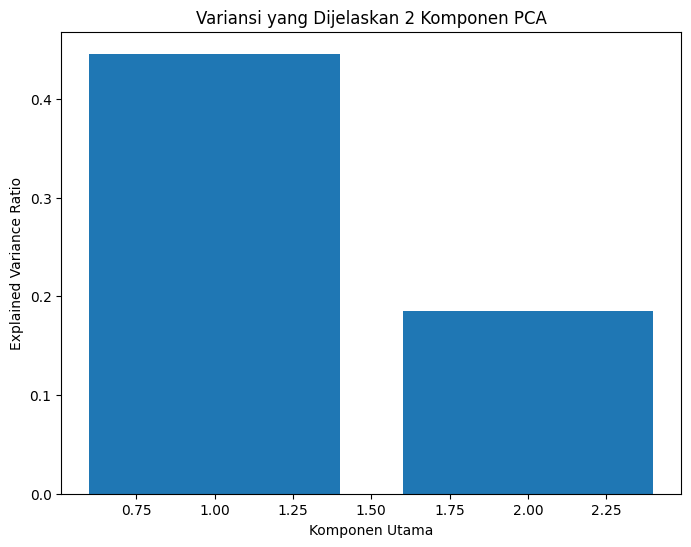

In [19]:
plt.bar([1, 2], explained)
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Variansi yang Dijelaskan 2 Komponen PCA')
plt.show()

Kode tersebut membuat grafik batang untuk menampilkan **explained variance ratio** dari dua komponen utama PCA. Perintah `plt.bar([1, 2], explained)` menggambar dua batang untuk Komponen 1 dan 2 berdasarkan nilai variansi yang dijelaskan pada variabel `explained`, lalu `xlabel`, `ylabel`, dan `title` memberi label sumbu serta judul grafik, dan `plt.show()` menampilkan hasilnya. Output grafik menunjukkan bahwa **Komponen 1 menjelaskan variansi paling besar** (sekitar 0,45), sedangkan **Komponen 2 menjelaskan variansi lebih kecil** (sekitar 0,18), sehingga komponen pertama lebih dominan dalam merangkum informasi data.

# 10. Bangun Model SVM dengan PCA

In [21]:
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Prediksi data test
y_pred_pca = svm_pca.predict(X_test_pca)

# Evaluasi akurasi
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Akurasi SVM dengan PCA:", acc_pca)
print(classification_report(y_test, y_pred_pca))

Akurasi SVM dengan PCA: 0.9298245614035088
              precision    recall  f1-score   support

           B       0.91      0.99      0.95        72
           M       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



Kode di atas digunakan untuk melatih dan mengevaluasi model **SVM** pada data yang sudah direduksi dimensinya dengan **PCA**. `predict()` digunakan untuk memprediksi data uji hasil PCA, dan `accuracy_score()` untuk menghitung akurasi model.

Output menunjukkan akurasi sekitar **0,9298 (92,98%)**, dengan performa kelas **B** cukup tinggi (recall 0,99), namun kelas **M** memiliki recall lebih rendah (0,83), yang berarti masih ada sebagian kasus malignant yang tidak terdeteksi dibanding model tanpa PCA. Kesimpulan dari `classification_report` menunjukkan bahwa model masih cukup baik, tetapi kemampuan mendeteksi
Malignant menurun, sehingga performanya lebih sederhana namun kurang akurat dibanding model tanpa PCA.

# 11. Perbandingan Hasil Model SVM

In [22]:
# Membandingkan hasil
hasil_perbandingan = pd.DataFrame({
    "Model": [
        "SVM (tanpa PCA)",
        f"SVM (dengan PCA - {X_train_pca.shape[1]} komponen)"
    ],
    "Jumlah_Fitur": [
        X_train.shape[1],
        X_train_pca.shape[1]
    ],
    "Akurasi": [
        acc_baseline,
        acc_pca
    ],
    "Total_Explained_Variance": [
        None,
        pca.explained_variance_ratio_.sum() # Correctly use the sum of explained variance for 2 components
    ]
})

hasil_perbandingan

,Model,Jumlah_Fitur,Akurasi,Total_Explained_Variance
0,SVM (tanpa PCA),30,97.368421,NaN
1,SVM (dengan PCA - 2 komponen),2,0.929825,0.631388


`pd.DataFrame()` digunakan untuk membuat tabel perbandingan antara model SVM tanpa PCA dan dengan PCA. Tabel ini menampilkan nama model, jumlah fitur, nilai akurasi, dan total variansi PCA. Hasilnya menunjukkan bahwa SVM tanpa PCA memakai 30 fitur dan memiliki akurasi lebih tinggi, sedangkan SVM dengan PCA hanya memakai 2 fitur, menyimpan sekitar 63,14% informasi data, tetapi akurasinya sedikit lebih rendah.

# 12. Visualisasi PCA 3D
     

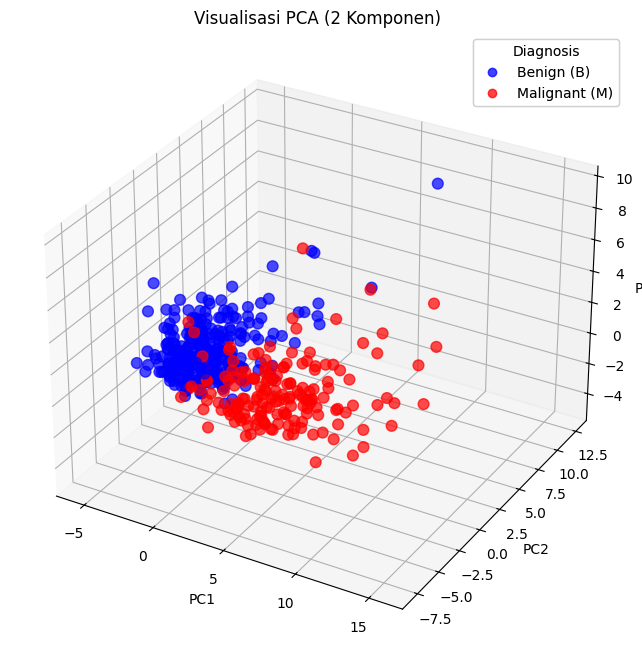

In [23]:
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111, projection='3d')

# Mengenkode y_train ke nilai numerik untuk pewarnaan
y_train_encoded_for_plot = y_train.map({'M': 1, 'B': 0})

scatter = ax.scatter(
    X_train_pca_3d[:, 0],
    X_train_pca_3d[:, 1],
    X_train_pca_3d[:, 2],
    c=y_train_encoded_for_plot,
    cmap='bwr',
    s=60,
    alpha=0.7
)

ax.set_title('Visualisasi PCA (2 Komponen)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Tambahkan legend dengan nama kelas yang sesuai legend_elements() [0] mengambil simbol warna
legend1 = ax.legend(
    handles=scatter.legend_elements()[0],
    labels=['Benign (B)', 'Malignant (M)'],
    title="Diagnosis"
)
ax.add_artist(legend1)

plt.show()

Kode `PCA(n_components=3)` digunakan untuk mengurangi data menjadi 3 komponen, lalu `fit_transform()` menerapkannya pada data latih yang sudah dinormalisasi. Bagian `plt.figure()` dan `add_subplot` digunakan untuk membuat grafik 3 dimensi.

Output merupakan visualisasi sebaran data hasil **PCA** yang memproyeksikan fitur asli ke ruang komponen utama (terlihat sumbu **PC1** dan **PC2**) dalam bentuk scatter 3D, dengan titik berwarna **biru** untuk kelas **Benign (B)** dan **merah** untuk **Malignant (M)**. Terlihat bahwa kedua kelas cenderung membentuk kelompok yang berbeda, benign lebih pada area PC1 yang lebih rendah, sedangkan malignant lebih banyak menyebar pada PC1 yang lebih tinggi meskipun masih ada beberapa titik yang saling tumpang tindih. Tumpang tindih ini menunjukkan pemisahan kelas dengan dua komponen PCA belum sepenuhnya sempurna, sehingga sebagian sampel memiliki karakteristik yang mirip antar kelas.


# 13. Perbandingan Hasil Model SVM - Grafik Batang

**Perbandingan Model SVM Tanpa PCA dan Dengan PCA**

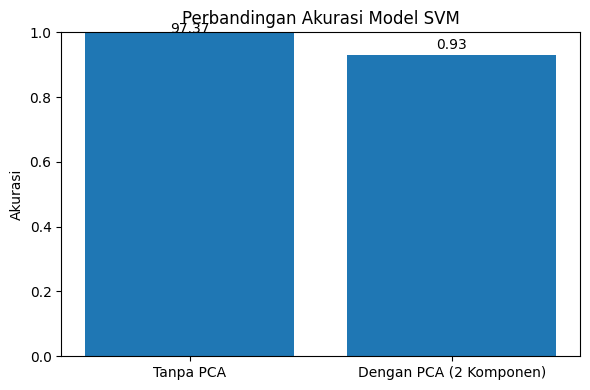

In [24]:
labels = ['Tanpa PCA', 'Dengan PCA (2 Komponen)']
values = [acc_baseline, acc_pca]  # sesuaikan variabel akurasinya

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values)

plt.title('Perbandingan Akurasi Model SVM')
plt.ylabel('Akurasi')
plt.ylim(0, 1.0)

# label angka di atas bar (biar tidak kepotong, posisinya sedikit di bawah batas atas)
for bar, v in zip(bars, values):
    y = min(v + 0.01, 0.99)  # kunci agar teks tidak nabrak batas 1.0
    plt.text(bar.get_x() + bar.get_width()/2, y, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Kode di atas adalah grafik batang untuk membandingkan akurasi model SVM **tanpa PCA** dan **dengan PCA (2 komponen)**. Variabel `labels` berisi nama kategori pada sumbu-x, sedangkan `values` berisi nilai akurasi, kemudian `plt.bar` untuk menggambar grafik batang.

Grafik menunjukkan akurasi **Tanpa PCA** lebih tinggi (sekitar **0,97 / 97,37%**) dibanding **Dengan PCA** (sekitar **0,93 / 93%**), sehingga reduksi menjadi 2 komponen menurunkan performa model pada data tersebut.

---

**Kesimpulan:** Praktikum ini bertujuan untuk memahami penerapan Principal Component Analysis (PCA) pada dataset Breast Cancer yang memiliki dimensi tinggi. PCA digunakan untuk mengurangi jumlah fitur dari 30 menjadi 2 komponen utama tanpa menghilangkan terlalu banyak informasi penting.
Hasil menunjukkan:

*  Baseline SVM tanpa PCA mencapai akurasi tinggi (97%), tapi dengan 30 fitur berisiko overfitting.
*  PCA sangat bermanfaat untuk reduksi dimensi dan pemahaman pola data, tetapi perlu dipertimbangkan antara penyederhanaan data dan performa model.